# Performance Analysis

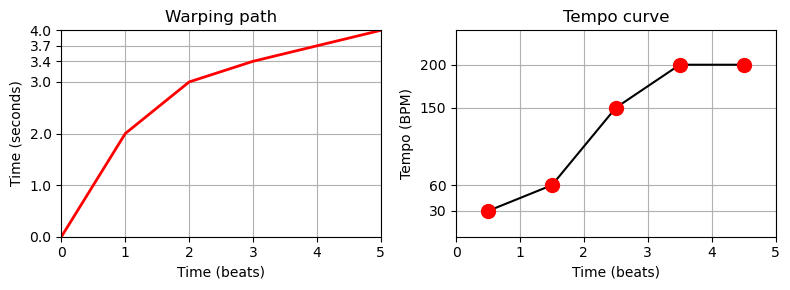

In [1]:
import os
import sys
import copy

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import librosa
import pandas as pd
from scipy import signal
from scipy.interpolate import interp1d
import scipy.ndimage.filters
%matplotlib inline

sys.path.append('..')
import libfmp.b
import libfmp.c1
import libfmp.c3

P = np.array([[0, 0], [2, 1], [3, 2], [3.4, 3], [3.7, 4], [4, 5]])
bpm = []

pos_audio1, pos_score1 = P[0, :]
for pos_audio2, pos_score2  in P[1:]:
    dur_audio = pos_audio2 - pos_audio1
    dur_score = pos_score2 - pos_score1
    bpm.append(60 * (dur_score / dur_audio))
    pos_audio1, pos_score1 = pos_audio2, pos_score2

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(P[:, 1], P[:, 0], 'r-', linewidth=2)
ax[0].set_yticks([0, 1, 2, 3.0, 3.4, 3.7, 4.0])
ax[0].grid()
ax[0].set_xlim([0, 5])
ax[0].set_ylim([0, 4])
ax[0].set_xlabel('Time (beats)')
ax[0].set_ylabel('Time (seconds)')
ax[0].set_title('Warping path')

ax[1].plot(np.arange(len(bpm)) + 0.5, bpm, 'k-')
ax[1].plot(np.arange(len(bpm)) + 0.5, bpm, 'ro', markersize=10)
ax[1].set_yticks([30, 60, 150, 200])
ax[1].grid()
ax[1].set_xlim([0, 5])
ax[1].set_ylim([0, 240])
ax[1].set_xlabel('Time (beats)')
ax[1].set_ylabel('Tempo (BPM)')
ax[1].set_title('Tempo curve')
plt.tight_layout()